# Analiza statystyk z Rotten Tomatoes
W projekcie przedstawię wizualizację danych z portalu Rotten Tomatoes opartego na datasecie z [Kaggle](https://www.kaggle.com/datasets/andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews). Sprawdzę również, jakie cechy filmu mają największy wpływ na jego odbiór przez widzów oraz krytyków. 

## Wczytywanie danych, import bibliotek

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
import matplotlib as mpl
import matplotlib.pyplot as plt

init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

movies_data = pd.read_csv('data/rotten_tomatoes_movies.csv')
reviews_data = pd.read_csv('data/rotten_tomatoes_movie_reviews.csv')

## Liczba filmów wydanych w konkretnym roku
Wizualizacja danych odnośnie wyprodukowanych filmów. Możemy zauważyć, że nasze aktualne dane sięgają 2021 roku, a w okolicach XXI wieku liczba wydawanych filmów stanowczo wzrosła.

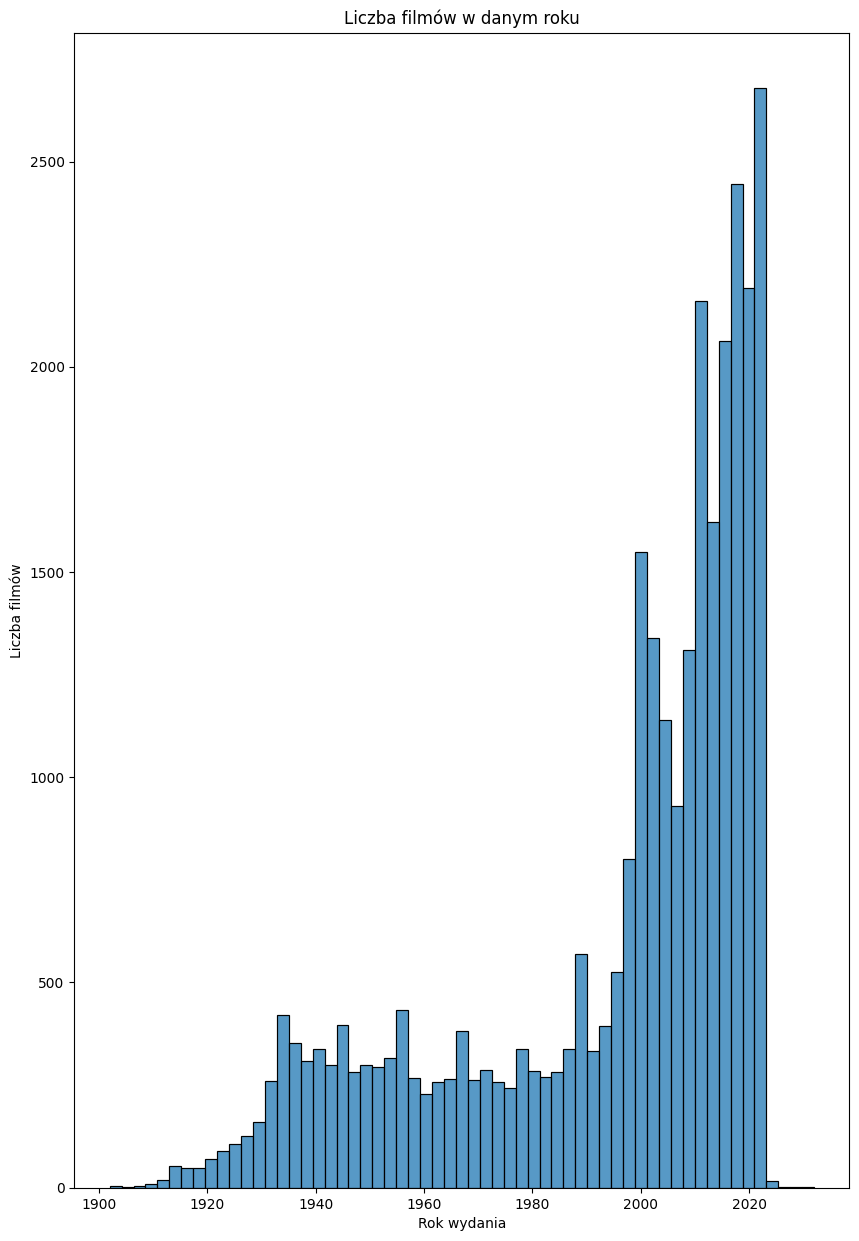

In [39]:
movies_data = movies_data[movies_data['releaseDateTheaters'].notnull()]
movies_data['releaseDateTheaters'] = pd.to_datetime(movies_data['releaseDateTheaters'])
movies_data['movieYear'] = movies_data['releaseDateTheaters'].apply(lambda x: x.year)

plt.figure(figsize=(10,15))
plt.title('Liczba filmów w danym roku')
sns.histplot(movies_data['movieYear'])
plt.ylabel('Liczba filmów')
plt.xlabel('Rok wydania')
plt.show()

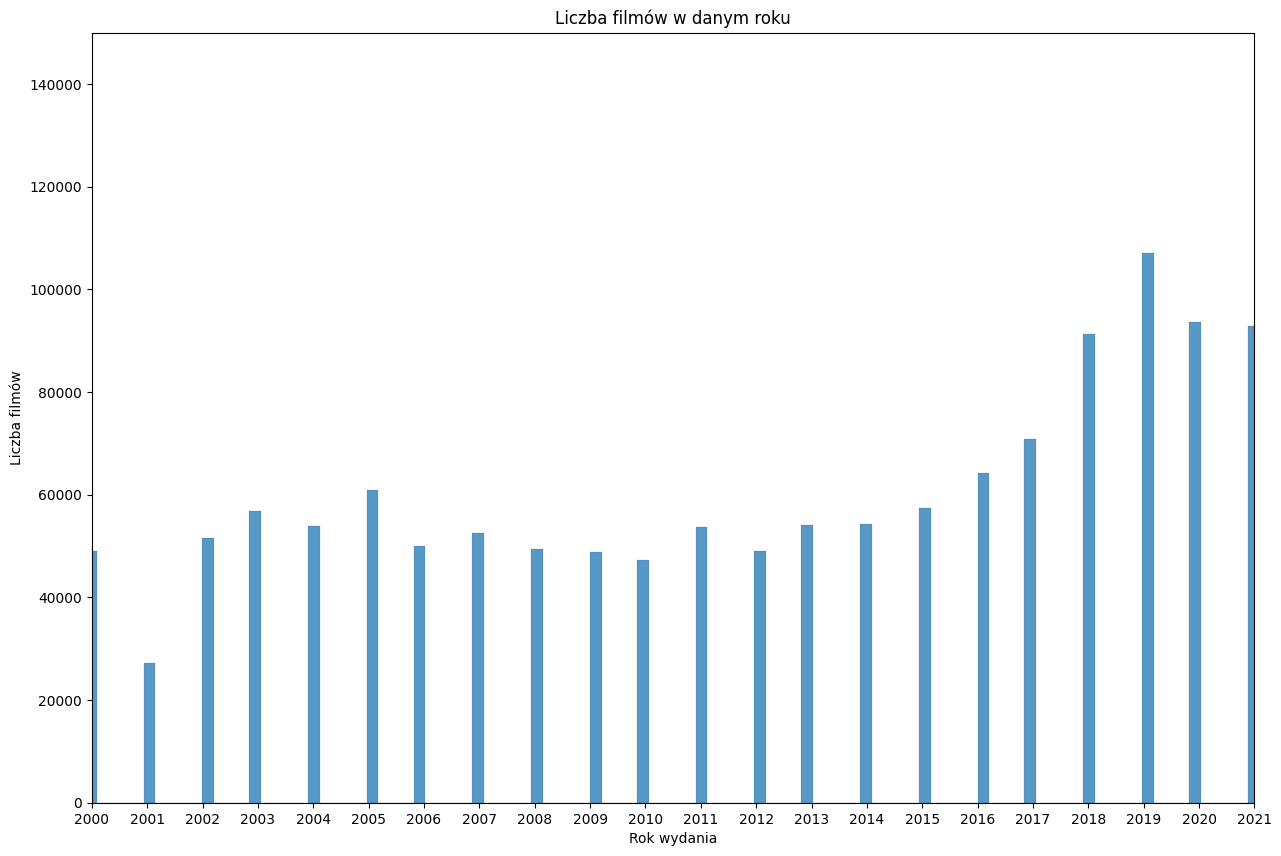

In [40]:
reviews_data = reviews_data[reviews_data['creationDate'].notnull()]
reviews_data['creationDate'] = pd.to_datetime(reviews_data['creationDate'])
reviews_data['reviewYear'] = reviews_data['creationDate'].apply(lambda x: x.year)

plt.figure(figsize=(15,10))
plt.title('Liczba ocen krytyków w danym roku')
sns.histplot(reviews_data['reviewYear'])
plt.ylabel('Liczba ocen krytyków')
plt.xlabel('Rok recenzji')
plt.axis([2000, 2019, 0, 130000])
plt.xticks(np.arange(2000, 2022, step=1))
plt.show()

## Rozkład recenzji krytyków i publiczności
Z danych jesteśmy w stanie zwizualizować liczbę recenzji w danym roku oraz ich częstotliwość w konkretnych latach.

<Axes: xlabel='movieYear', ylabel='tomatoMeter'>

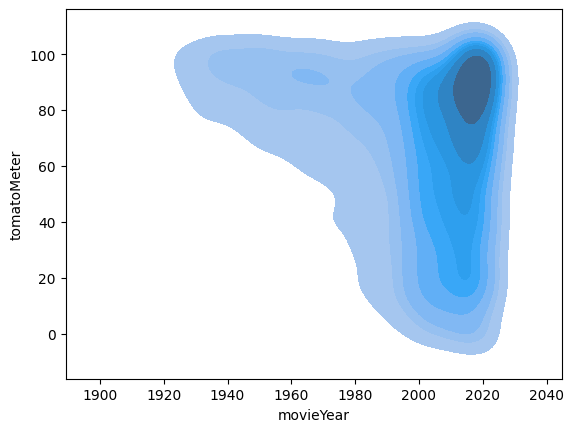

In [41]:
movies_data = movies_data[(movies_data['tomatoMeter'].notnull())]
sns.kdeplot(data=movies_data, x="movieYear", y="tomatoMeter", fill=True)

<Axes: xlabel='movieYear', ylabel='audienceScore'>

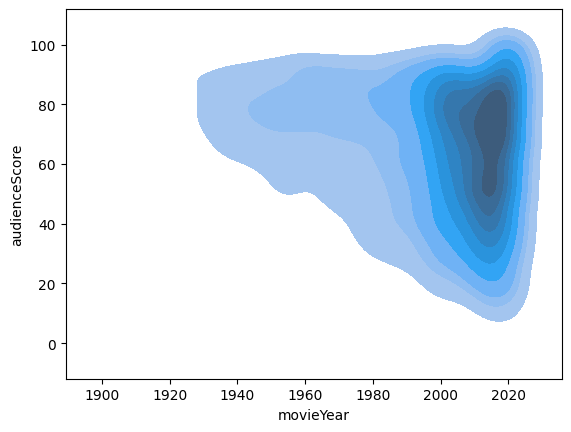

In [36]:
movies_data = movies_data[(movies_data['audienceScore'].notnull())]
sns.kdeplot(data=movies_data, x="movieYear", y="audienceScore", fill=True)

## Gatunki filmów
W dalszej części skupimy się na znalezieniu najczęstszych gatunków filmów, które trafiają do kin. Sprawdzimy również jak dane gatunki są oceniane zarówno przez krytyków, jak i przez widzów oraz poznamy ratio jakości danego gatunku.

Text(0.5, 1.0, 'Gatunki filmów')

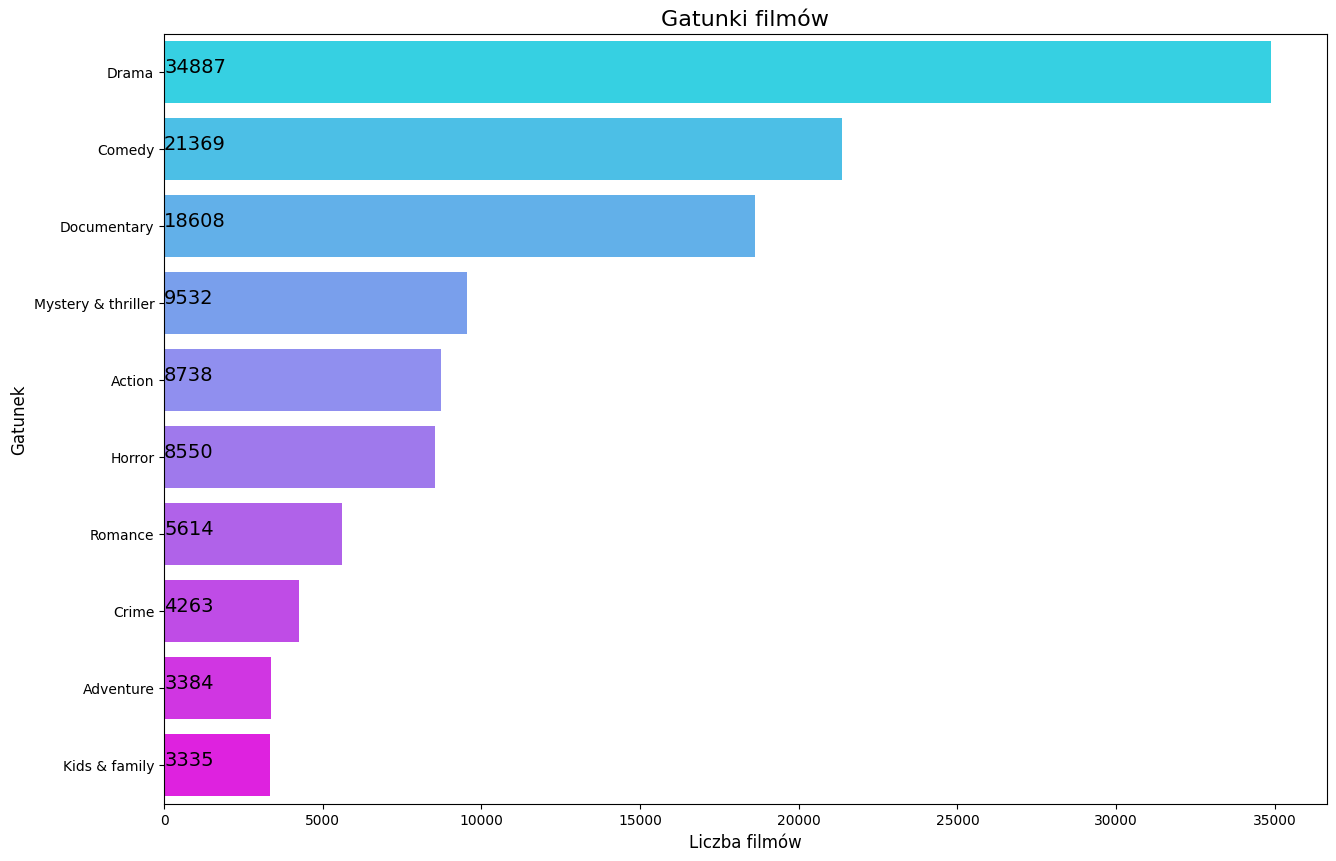

In [48]:
movies_data['first_genre'] = movies_data['genre'].str.split(',').str[0]

a = plt.cm.cool

plt.figure(figsize=(15,10))
count = movies_data['first_genre'].value_counts()[:10]
sns.barplot(x=count.values, y=count.index, palette=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7),a(0.8),a(0.9),a(0.99)])
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=14)
plt.xlabel('Liczba filmów', fontsize=12)
plt.ylabel('Gatunek', fontsize=12)
plt.title("Gatunki filmów", fontsize=16)

In [49]:
movies_data['tomatometer_status'] = ['Certified-Fresh' if x > 95 else 'Fresh' if x > 65 else 'Rotten' for x in movies_data['tomatoMeter']]
movies_data['audience_status'] = ['Upright' if x > 65 else 'Spilled' for x in movies_data['audienceScore']]

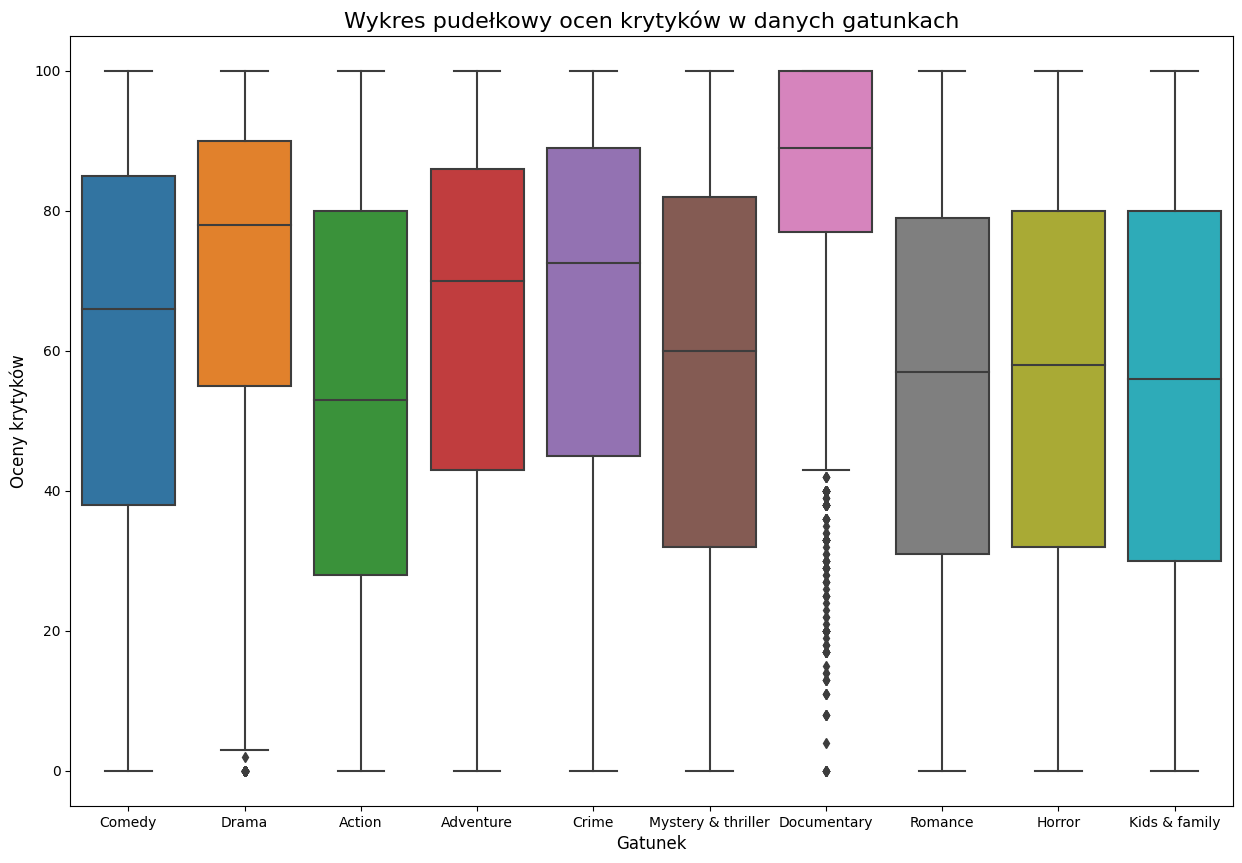

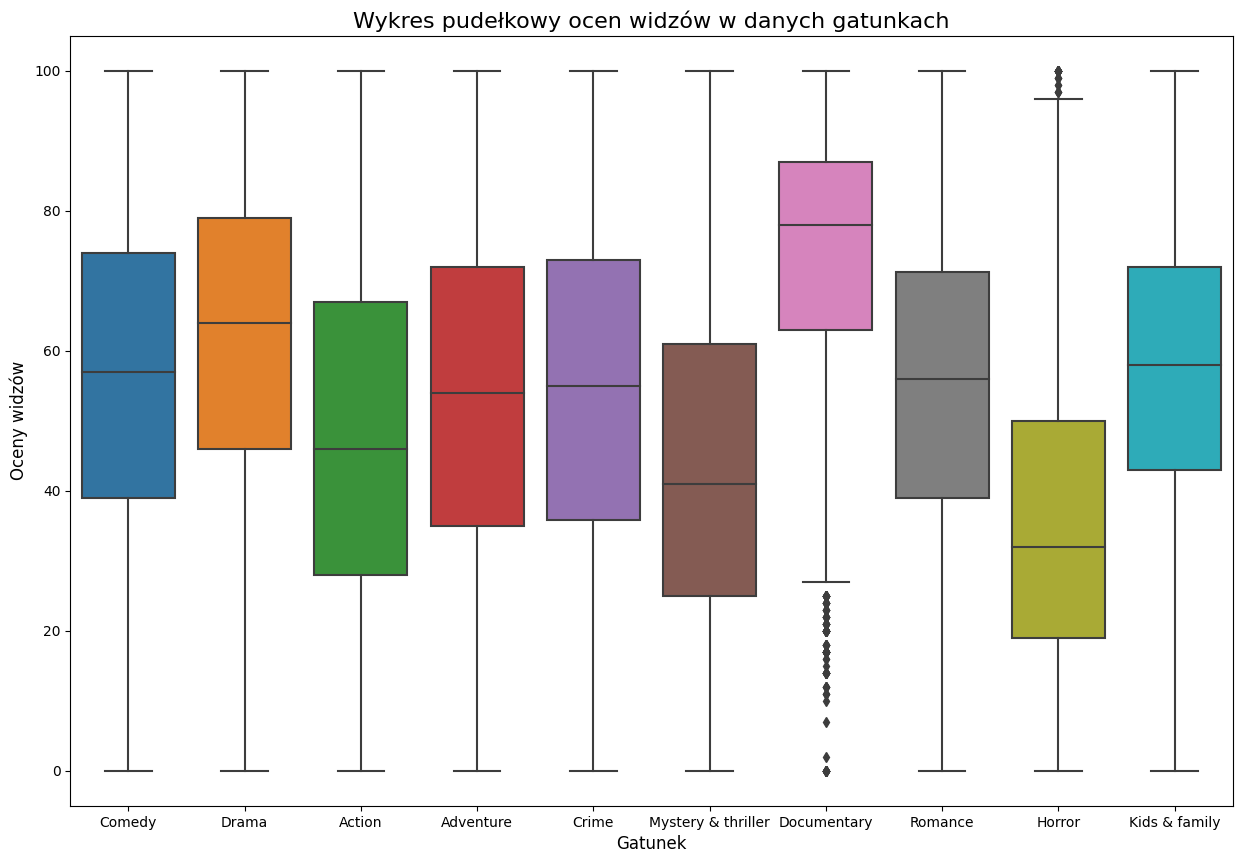

In [54]:
top_genres = list(count.index)
movie_genres_df = movies_data[movies_data['first_genre'].isin(top_genres)]
movie_genres_df = movie_genres_df[pd.notnull(movie_genres_df[['first_genre', 'tomatoMeter', 'tomatometer_status', 'audienceScore', 'audience_status']])]

plt.figure(figsize=(15, 10))
sns.boxplot(x='first_genre', y='tomatoMeter', data=movie_genres_df)
plt.xlabel("Gatunek",fontsize=12)
plt.ylabel("Oceny krytyków",fontsize=12)
plt.title("Wykres pudełkowy ocen krytyków w danych gatunkach", fontsize=16)
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(x='first_genre', y='audienceScore', data=movie_genres_df)
plt.xlabel("Gatunek",fontsize=12)
plt.ylabel("Oceny widzów",fontsize=12)
plt.title("Wykres pudełkowy ocen widzów w danych gatunkach", fontsize=16)
plt.show()

In [55]:
genre_rating_tomatometer = pd.crosstab(movie_genres_df.first_genre, movie_genres_df.tomatometer_status, margins=True)
genre_rating_tomatometer.style.background_gradient(cmap='summer_r')

tomatometer_status,Certified-Fresh,Fresh,Rotten,All
first_genre,,,,
Action,109,562,8067,8738
Adventure,67,243,3074,3384
Comedy,522,2394,18453,21369
Crime,146,463,3654,4263
Documentary,1614,2734,14260,18608
Drama,1254,4066,29567,34887
Horror,119,829,7602,8550
Kids & family,70,395,2870,3335
Mystery & thriller,144,850,8538,9532


In [65]:
genre_rating_audience = pd.crosstab(movie_genres_df.first_genre, movie_genres_df.audience_status, margins=True)
genre_rating_audience.style.background_gradient(cmap='summer_r')

audience_status,Spilled,Upright,All
first_genre,,,
Action,7455,1283,8738
Adventure,2829,555,3384
Comedy,16849,4520,21369
Crime,3395,868,4263
Documentary,13704,4904,18608
Drama,26987,7900,34887
Horror,7935,615,8550
Kids & family,2458,877,3335
Mystery & thriller,8382,1150,9532


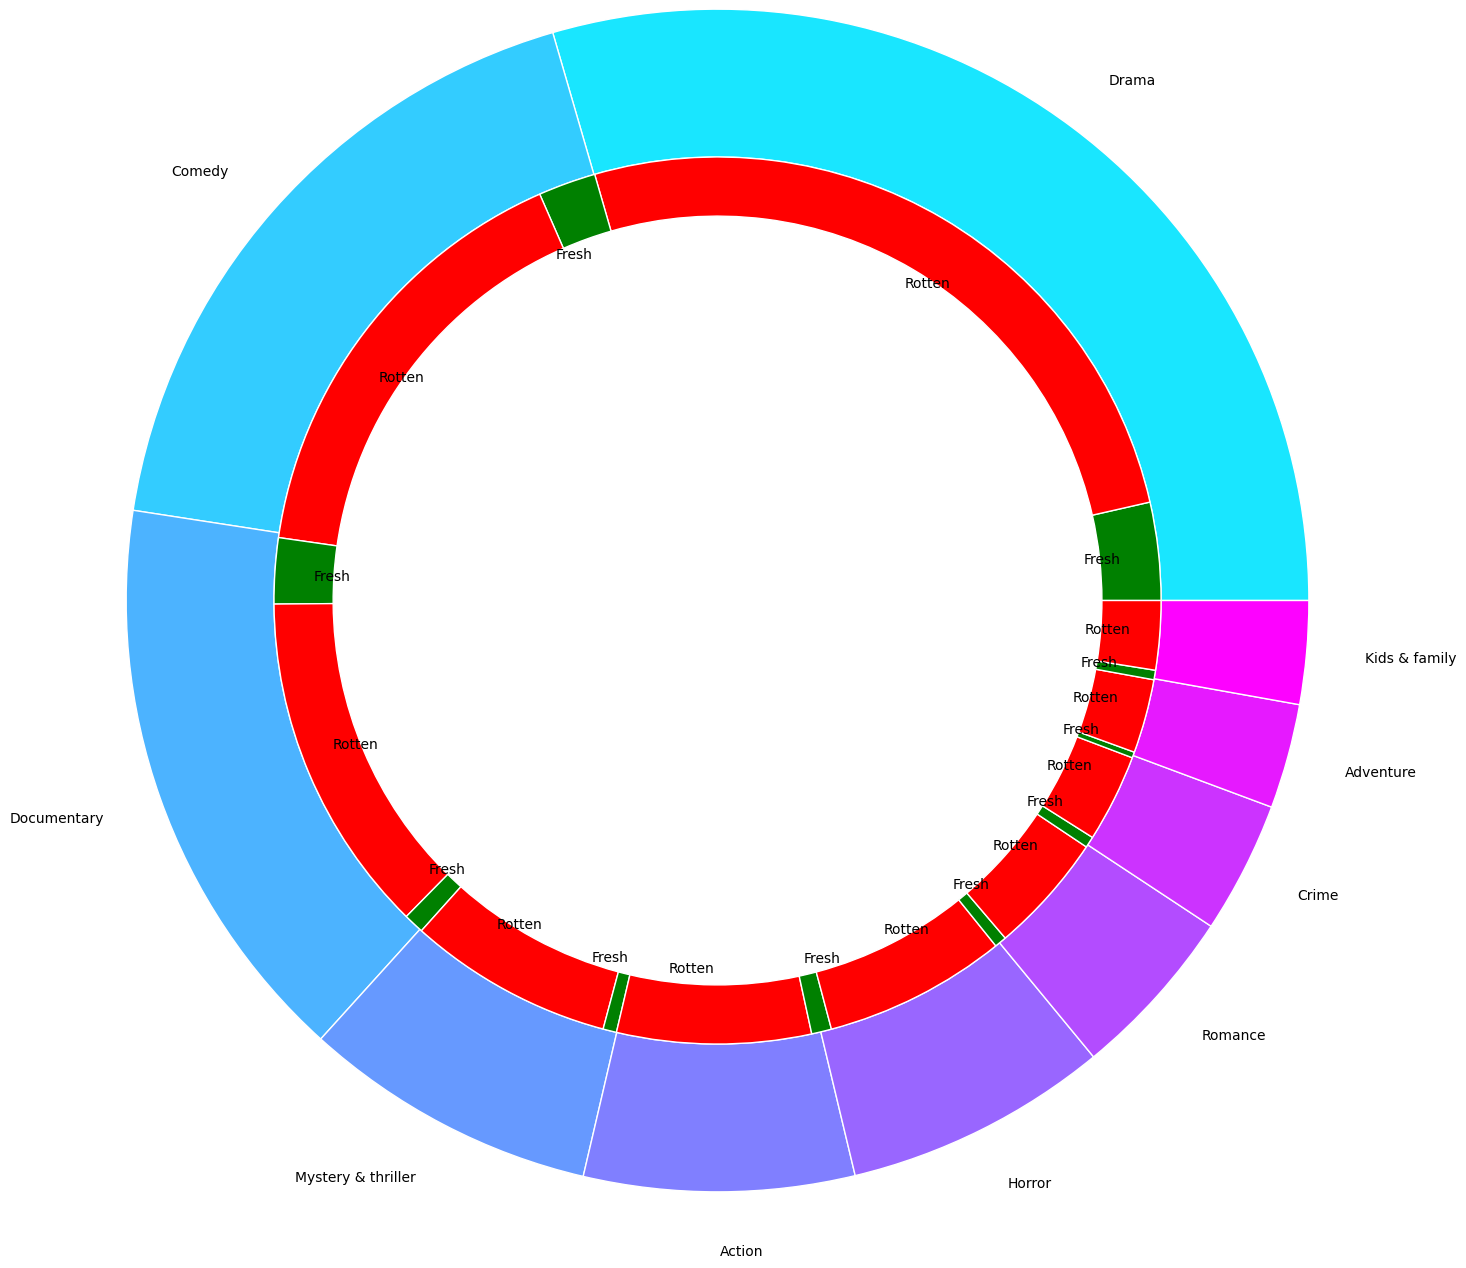

In [69]:
group_names = movie_genres_df.first_genre.value_counts().head(10).index
group_size = movie_genres_df.first_genre.value_counts().head(10)
subgroup_names = ['Fresh','Rotten', 'Fresh','Rotten', 'Fresh','Rotten',  'Fresh', 'Rotten',
                  'Fresh','Rotten', 'Fresh','Rotten', 'Fresh','Rotten',  'Fresh', 'Rotten',
                   'Fresh', 'Rotten',  'Fresh', 'Rotten']
size_list = []
for element in group_names:
    # size_list.append(genre_rating_tomatometer.loc[element]['Certified-Fresh'])
    size_list.append(genre_rating_tomatometer.loc[element]['Fresh'])
    size_list.append(genre_rating_tomatometer.loc[element]['Rotten'])
subgroup_size = size_list

fig, ax = plt.subplots()
ax.axis('equal')
outter_pie, _ = ax.pie(group_size, radius=4, labels=group_names,
                       colors=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7),a(0.8),a(0.9),a(0.99)])
plt.setp(outter_pie, width=1, edgecolor='white') 
inner_pie, _ = ax.pie(subgroup_size, radius=3, labels=subgroup_names, labeldistance=0.83,
                      colors=['green','red', 'green','red', 'green','red', 'green','red',
                              'green','red', 'green','red', 'green','red', 'green','red',
                              'green','red', 'green','red'])
plt.setp(inner_pie, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.show()

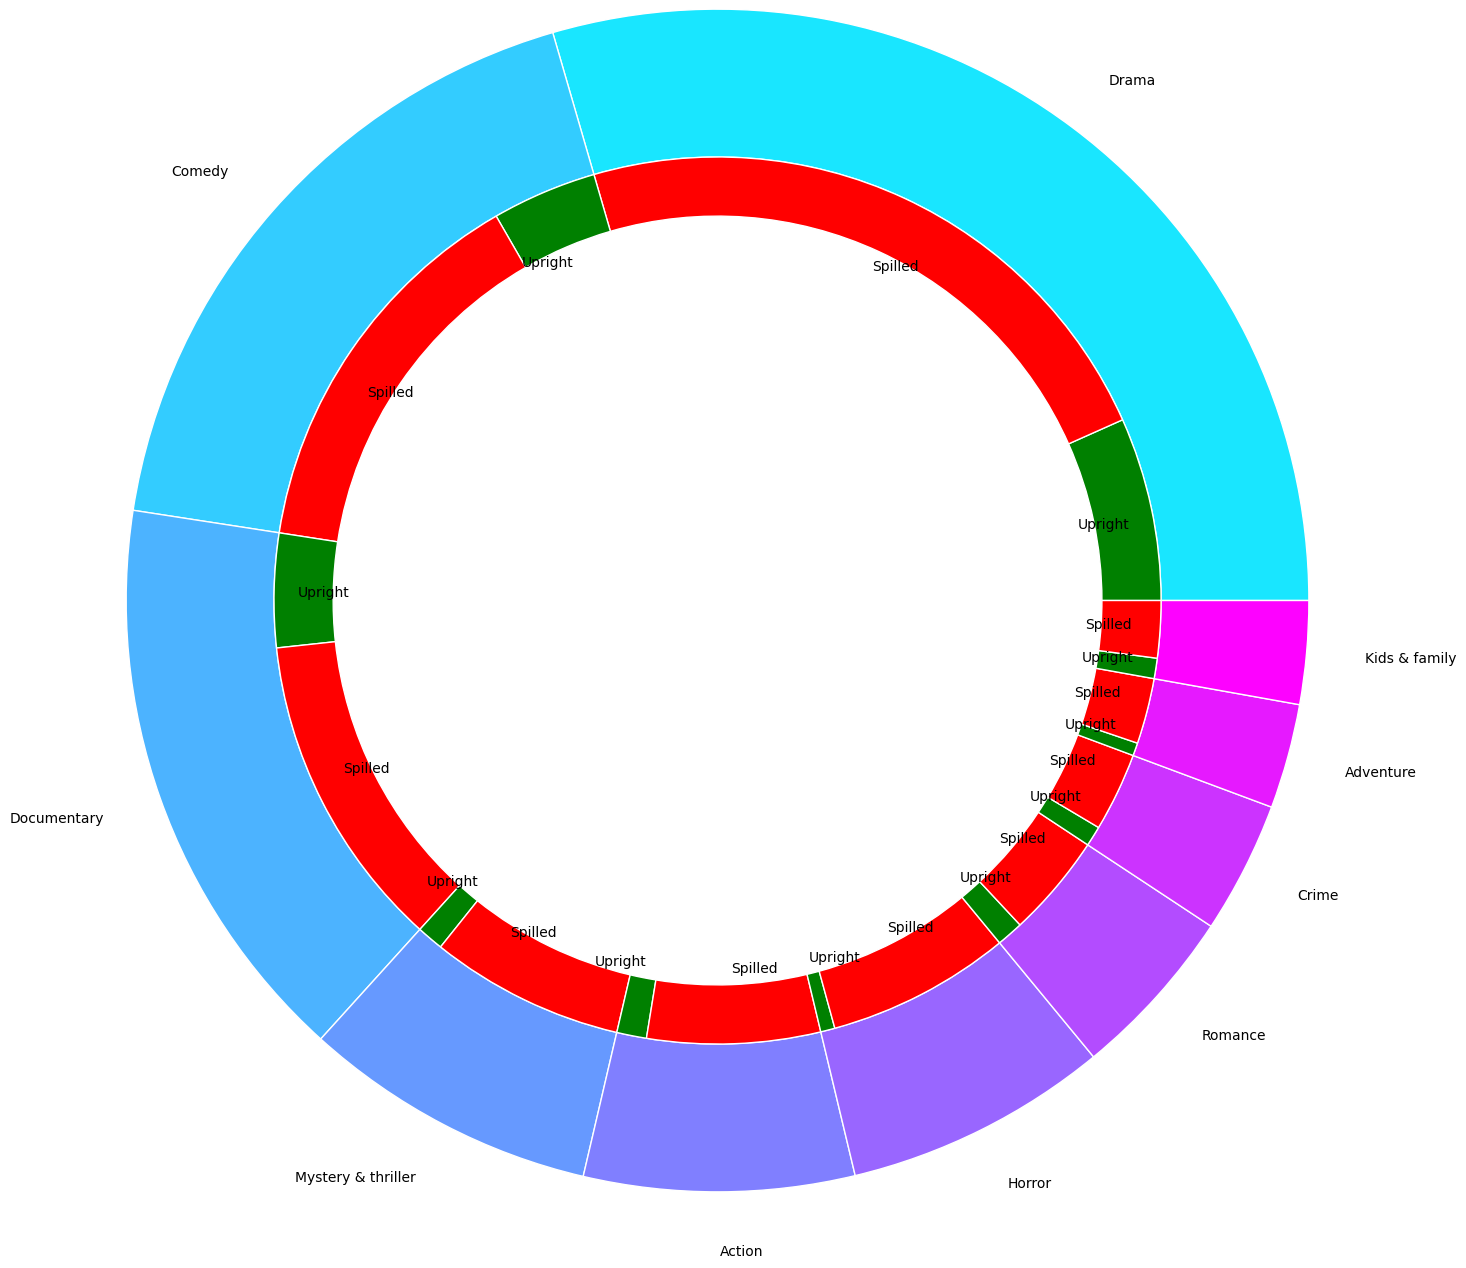

In [68]:
group_names = movie_genres_df.first_genre.value_counts().head(10).index
group_size = movie_genres_df.first_genre.value_counts().head(10)
subgroup_names = ['Upright','Spilled', 'Upright','Spilled', 'Upright','Spilled', 'Upright','Spilled',
                  'Upright','Spilled', 'Upright','Spilled', 'Upright','Spilled', 'Upright','Spilled',
                  'Upright','Spilled', 'Upright','Spilled']
size_list = []
for element in group_names:
    size_list.append(genre_rating_audience.loc[element]['Upright'])
    size_list.append(genre_rating_audience.loc[element]['Spilled'])
subgroup_size = size_list

fig, ax = plt.subplots()
ax.axis('equal')
outter_pie, _ = ax.pie(group_size, radius=4, labels=group_names,
                       colors=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7),a(0.8),a(0.9),a(0.99)])
plt.setp(outter_pie, width=1, edgecolor='white') 
inner_pie, _ = ax.pie(subgroup_size, radius=3, labels=subgroup_names, labeldistance=0.83,
                      colors=['green','red', 'green','red', 'green','red', 'green','red',
                              'green','red', 'green','red', 'green','red', 'green','red',
                              'green','red', 'green','red'])
plt.setp(inner_pie, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.show()